In [19]:
library(tidyverse)
options(repr.matrix.max.rows = 10)
library(ggplot)

ERROR: Error in library(ggplot): there is no package called 'ggplot'


In [4]:
filepath <- "../../data/raw/pumpkins.csv"
pumpkins <- read_csv(filepath, show_col_types = FALSE)

In [7]:
str(pumpkins)

spec_tbl_df [28,065 x 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id               : chr [1:28065] "2013-F" "2013-F" "2013-F" "2013-F" ...
 $ place            : chr [1:28065] "1" "2" "3" "4" ...
 $ weight_lbs       : chr [1:28065] "154.50" "146.50" "145.00" "140.80" ...
 $ grower_name      : chr [1:28065] "Ellenbecker, Todd & Sequoia" "Razo, Steve" "Ellenbecker, Todd & Sequoia" "Martin, Margaret & Glen" ...
 $ city             : chr [1:28065] "Gleason" "New Middletown" "Glenson" "Combined Locks" ...
 $ state_prov       : chr [1:28065] "Wisconsin" "Ohio" "Wisconsin" "Wisconsin" ...
 $ country          : chr [1:28065] "United States" "United States" "United States" "United States" ...
 $ gpc_site         : chr [1:28065] "Nekoosa Giant Pumpkin Fest" "Ohio Valley Giant Pumpkin Growers Weigh-off" "Mishicot Pumpkin Fest" "Cedarburg Wine and Harvest Festival" ...
 $ seed_mother      : chr [1:28065] "209 Werner" "150.5 Snyder" "209 Werner" "109 Martin '12" ...
 $ pollinator_father: chr [1:2

In [36]:
# tidyup data
# 1. with the word 'damaged' in the the place column
# 2. with weight_lbs = 0
# 3. convert weight_lbs from char to numeric
pumpkins_tidy <- pumpkins |>
  filter(!str_detect(place, ".damaged.") & weight_lbs > 0) |>
  mutate(
    weight_lbs = as.numeric(weight_lbs),
    ott = as.numeric(ott),
    est_weight = as.numeric(est_weight),
    pct_chart = as.numeric(pct_chart),
    country = as.factor(country),
    year = str_sub(id, 1, 4)
  )

Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"
Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"


In [37]:
pumpkins_tidy

id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,pct_chart,variety,year
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013-F,1,154.5,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184,129,20,NA,2013
2013-F,2,146.5,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,NA,194,151,-3,NA,2013
2013-F,3,145.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177,115,26,NA,2013
2013-F,4,140.8,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194,151,-7,NA,2013
2013-F,5,139.0,"Barlow, John",NA,Wisconsin,United States,Stillwater Harvestfest,130.5 McKinnon,open,0,0,0,NA,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-W,DMG,181.0,"Williams, Hc",Bailey,North Carolina,United States,Yadkin Valley Pumpkin Weigh-off,255 Mitchell,NA,185,180,1,NA,2021
2021-W,DMG,159.5,"Huber, Brandon",Raleigh,North Carolina,United States,Yadkin Valley Pumpkin Weigh-off,330 Vial,NA,175,152,5,NA,2021
2021-W,DMG,141.0,"Vester, Danny",Spring Hope,North Carolina,United States,Tennessee Valley Fair,305 Vial,NA,169,139,1,NA,2021


In [34]:
levels(pumpkins_tidy$country)

[1] "Australia"       "Austria"         "Belgium"         "Canada"         
 [5] "Finland"         "France"          "Germany"         "Ireland"        
 [9] "Italy"           "Japan"           "Luxembourg"      "New Zealand"    
[13] "Poland"          "Portugal"        "Slovenia"        "Spain"          
[17] "Switzerland"     "The Netherlands" "United Kingdom"  "United States"  
[21] "Unknown country"

In [134]:
print(summary(pumpkins_tidy))

      id               place             weight_lbs    grower_name       
 Length:28011       Length:28011       Min.   :  0.1   Length:28011      
 Class :character   Class :character   1st Qu.: 70.0   Class :character  
 Mode  :character   Mode  :character   Median :169.5   Mode  :character  
                                       Mean   :303.5                     
                                       3rd Qu.:526.4                     
                                       Max.   :999.8                     
                                       NA's   :5213                      
     city            state_prov                 country        gpc_site        
 Length:28011       Length:28011       United States:17070   Length:28011      
 Class :character   Class :character   Canada       : 4522   Class :character  
 Mode  :character   Mode  :character   Germany      : 2175   Mode  :character  
                                       Italy        :  846                     
        

Warning message:
"Removed 5213 rows containing non-finite values (stat_bin)."


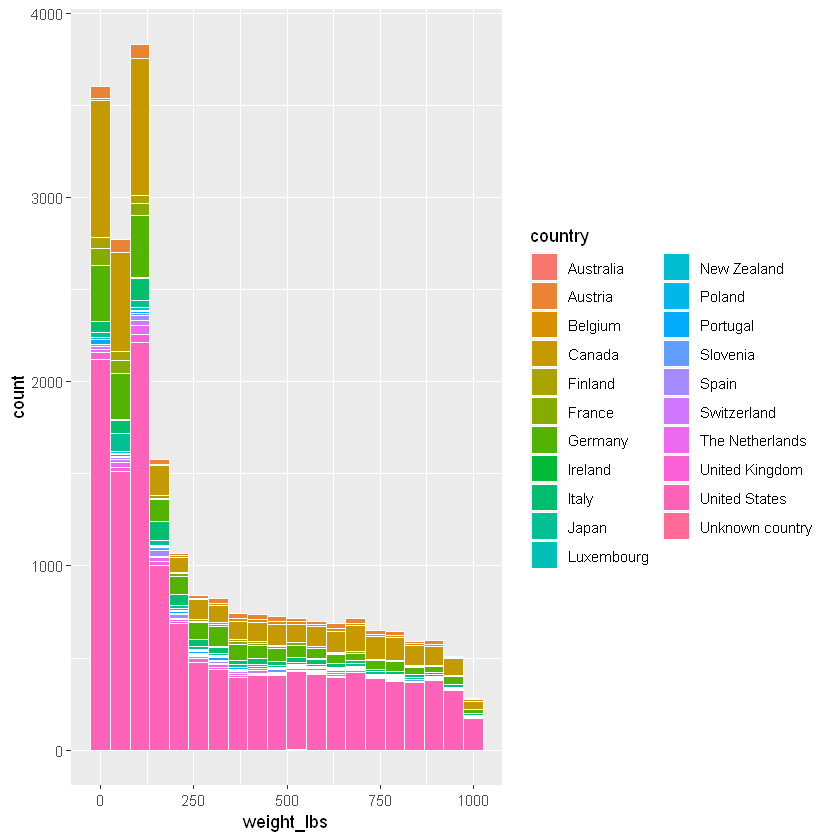

In [75]:
# explore the distribution of selected columns (weight_lbs, country, ott, year)
options(repr.plot.width = 7, repr.plot.height = 7)

weight_plot <- pumpkins_tidy |>
  ggplot(aes(x = weight_lbs, fill = country)) +
  geom_histogram(bins = 20, color = "white")

weight_plot

Warning message:
"Removed 3157 rows containing non-finite values (stat_bin)."


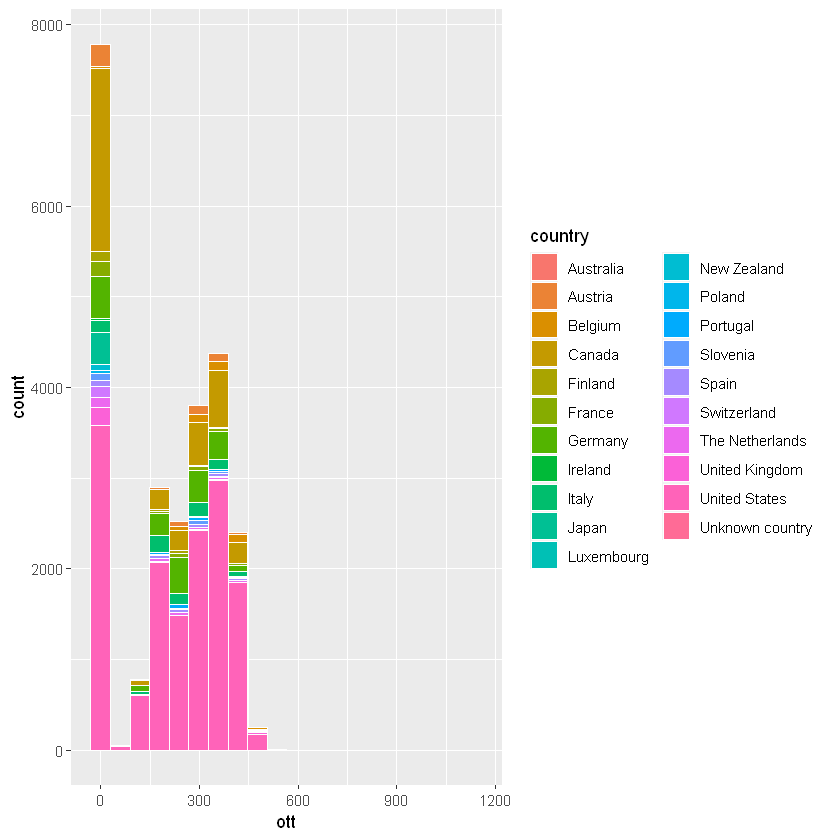

In [76]:
ott_plot <- pumpkins_tidy |>
  ggplot(aes(x = ott, fill = country)) +
  geom_histogram(bins = 20, color = "white")
ott_plot

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


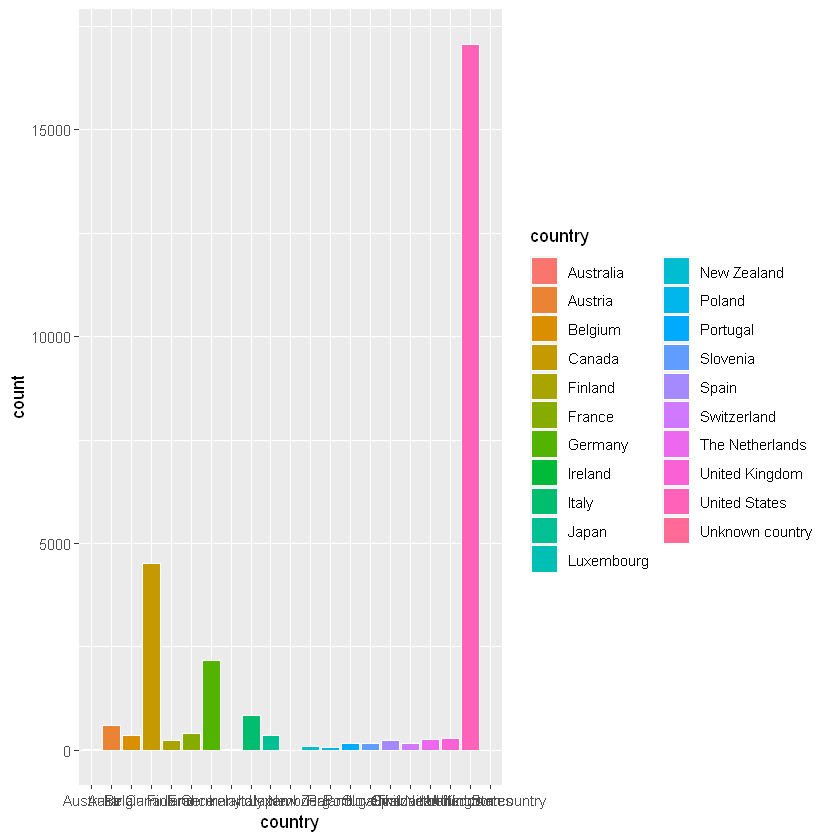

In [79]:
country_plot <- pumpkins_tidy |>
  ggplot(aes(x = country, fill = country)) +
  geom_histogram(stat = "count", color = "white")
country_plot

Warning message:
"Removed 8370 rows containing missing values (geom_point)."


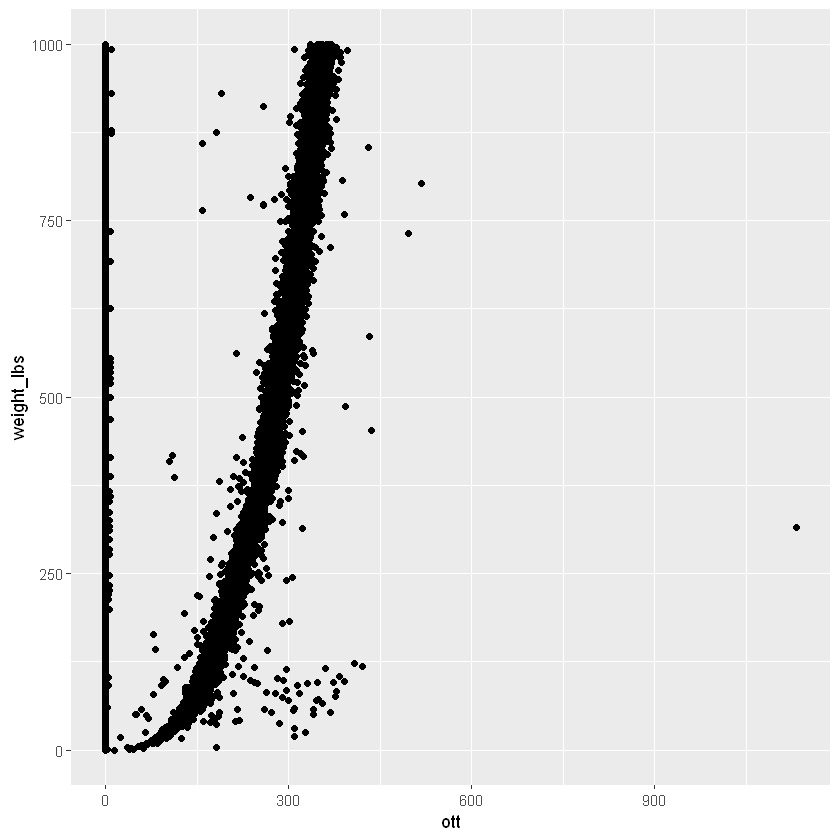

In [88]:
weight_ott_plot <- pumpkins_tidy |>
  ggplot(aes(x = ott, y = weight_lbs)) +
  geom_point(size)
weight_ott_plot

In [82]:
pumpkins_canada <- pumpkins_tidy |>
  filter(country == "Canada")
pumpkins_canada

id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,pct_chart,variety,year
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013-F,10,134,"Coolen, Russell",Boutiliers Point,Nova Scotia,Canada,The Great Howard Dill Giant Pumpkin Classic,97 Dill,Self,0,0,0,NA,2013
2013-F,11,132,"Aten, Al",Springvale,Prince Edward Island,Canada,The Great Howard Dill Giant Pumpkin Classic,142 Aten,103 MacKinnon,0,0,0,NA,2013
2013-F,12,131,"MacKinnon, John",Strathlorne,Nova Scotia,Canada,Joe King Memorial Giant Pumpkin Weigh-off,110 MacKinnon,103 MacKinnon,177,115,14,NA,2013
2013-F,16,128,"Lyons, Chris",Scarborough,Ontario,Canada,Port Elgin Pumpkinfest,81 Wolf,85 Eaton,0,0,0,NA,2013
2013-F,21,124,"MacKinnon, Betty",Strathlorne,Nova Scotia,Canada,Joe King Memorial Giant Pumpkin Weigh-off,103 Mackinnon,110 MacKinnon,172,104,19,NA,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-W,160,81,"Ansems, Catharina",Steam Mill,Nova Scotia,Canada,Annapolis Valley Giant Vegetable Growers,80 Cameron'20,self,143,87,-7,NA,2021
2021-W,178,60,"Ansems, Fred",Steam Mill,Nova Scotia,Canada,The Great Howard Dill Giant Pumpkin Classic,66 Ansems,sib,0,0,0,NA,2021
2021-W,183,59,"Ansems, Shirley",Steam Mill,Nova Scotia,Canada,Annapolis Valley Giant Vegetable Growers,66Ansems,NA,0,0,0,NA,2021


In [142]:
# avg weight by country
pumpkins_tidy_country <- pumpkins_tidy |>
  group_by(country) |>
  summarize(count = n(), mean_weight = mean(weight_lbs, na.rm = TRUE), mean_ott = mean(ott, na.rm = TRUE)) |>
  arrange(desc(mean_weight))
pumpkins_tidy_country |> slice(1:10)

country,count,mean_weight,mean_ott
<fct>,<int>,<dbl>,<dbl>
Belgium,360,558.0198,332.83714
Unknown country,1,526.0000,287.00000
Luxembourg,1,521.2000,315.00000
Slovenia,167,454.2000,187.34731
Austria,602,349.3097,168.92477
Switzerland,166,336.3300,56.96667
Portugal,149,323.5062,248.42857
Spain,229,313.6908,204.79646
United States,17070,307.8908,226.32592


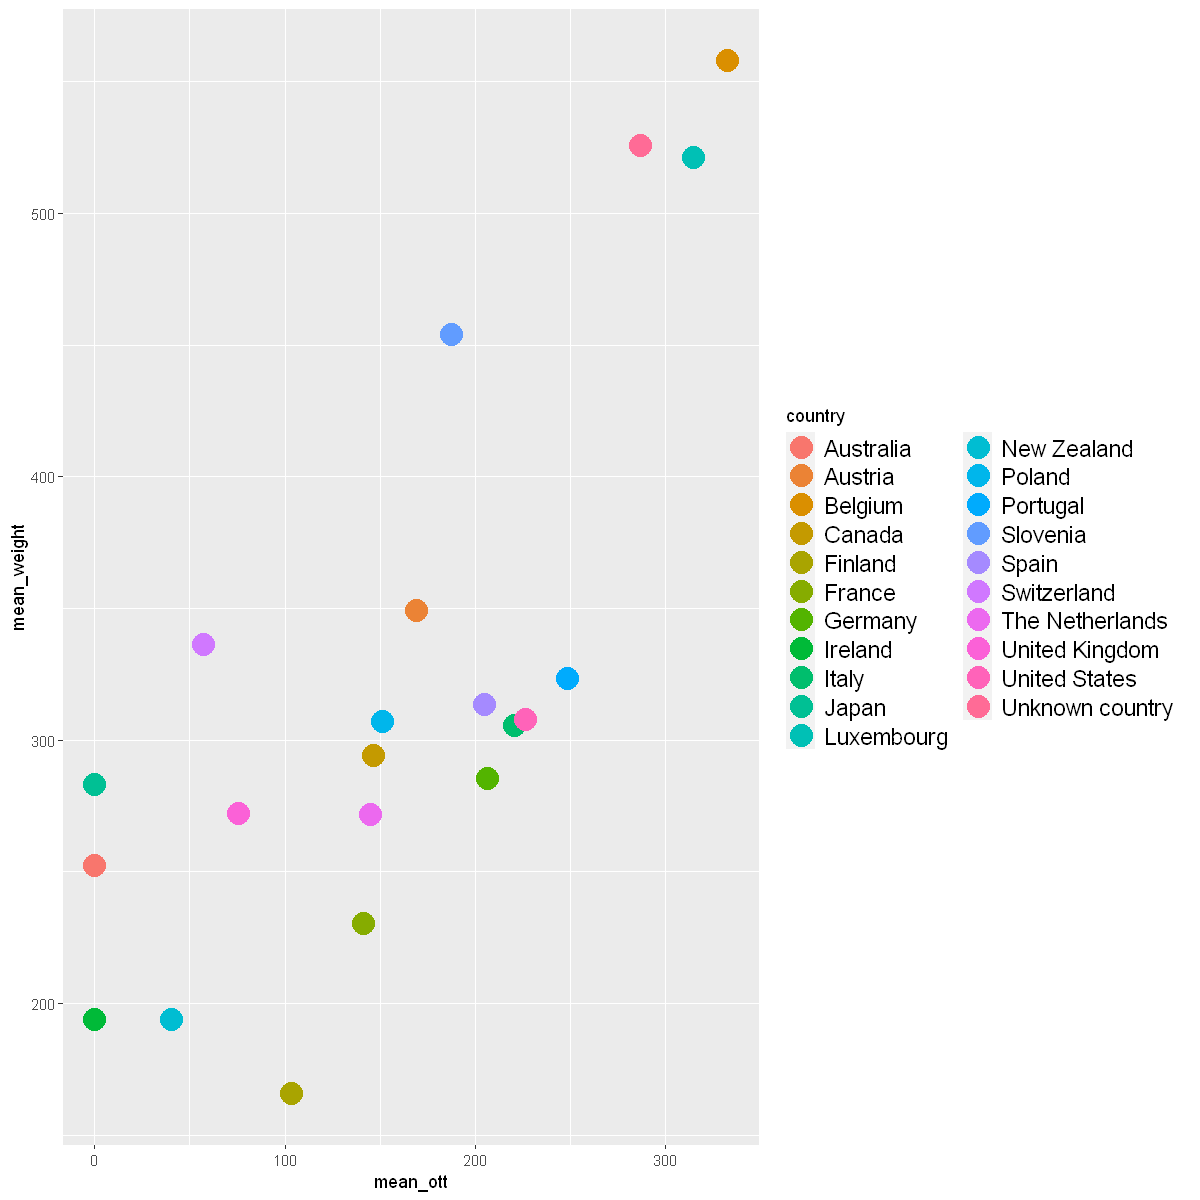

In [ ]:
# avg weight / avg ott by country
options(repr.plot.width = 10, repr.plot.height = 10)
weight_ott_plot <- pumpkins_tidy_country |>
  ggplot(aes(x = mean_ott, y = mean_weight, color = country)) +
  geom_point(size = 6) +
  theme(legend.text = element_text(size = 14))

weight_ott_plot

In [135]:
# avg weight by Canada provence
pumpkins_canada_summary <- pumpkins_canada |>
  group_by(state_prov) |>
  summarize(count = n(), mean_weight = mean(weight_lbs, na.rm = TRUE), mean_ott = mean(ott, na.rm = TRUE)) |>
  arrange(desc(count))
pumpkins_canada_summary

state_prov,count,mean_weight,mean_ott
<chr>,<int>,<dbl>,<dbl>
Ontario,2021,279.6772,156.57204
Nova Scotia,1049,270.1331,108.23799
Quebec,457,339.2128,142.80494
Alberta,300,228.1775,21.53691
Manitoba,262,366.7865,248.61000
New Brunswick,211,357.9574,235.55450
British Columbia,183,416.9342,251.45198
Prince Edward Island,24,359.9670,232.63158
Saskatchewan,15,645.0385,24.00000


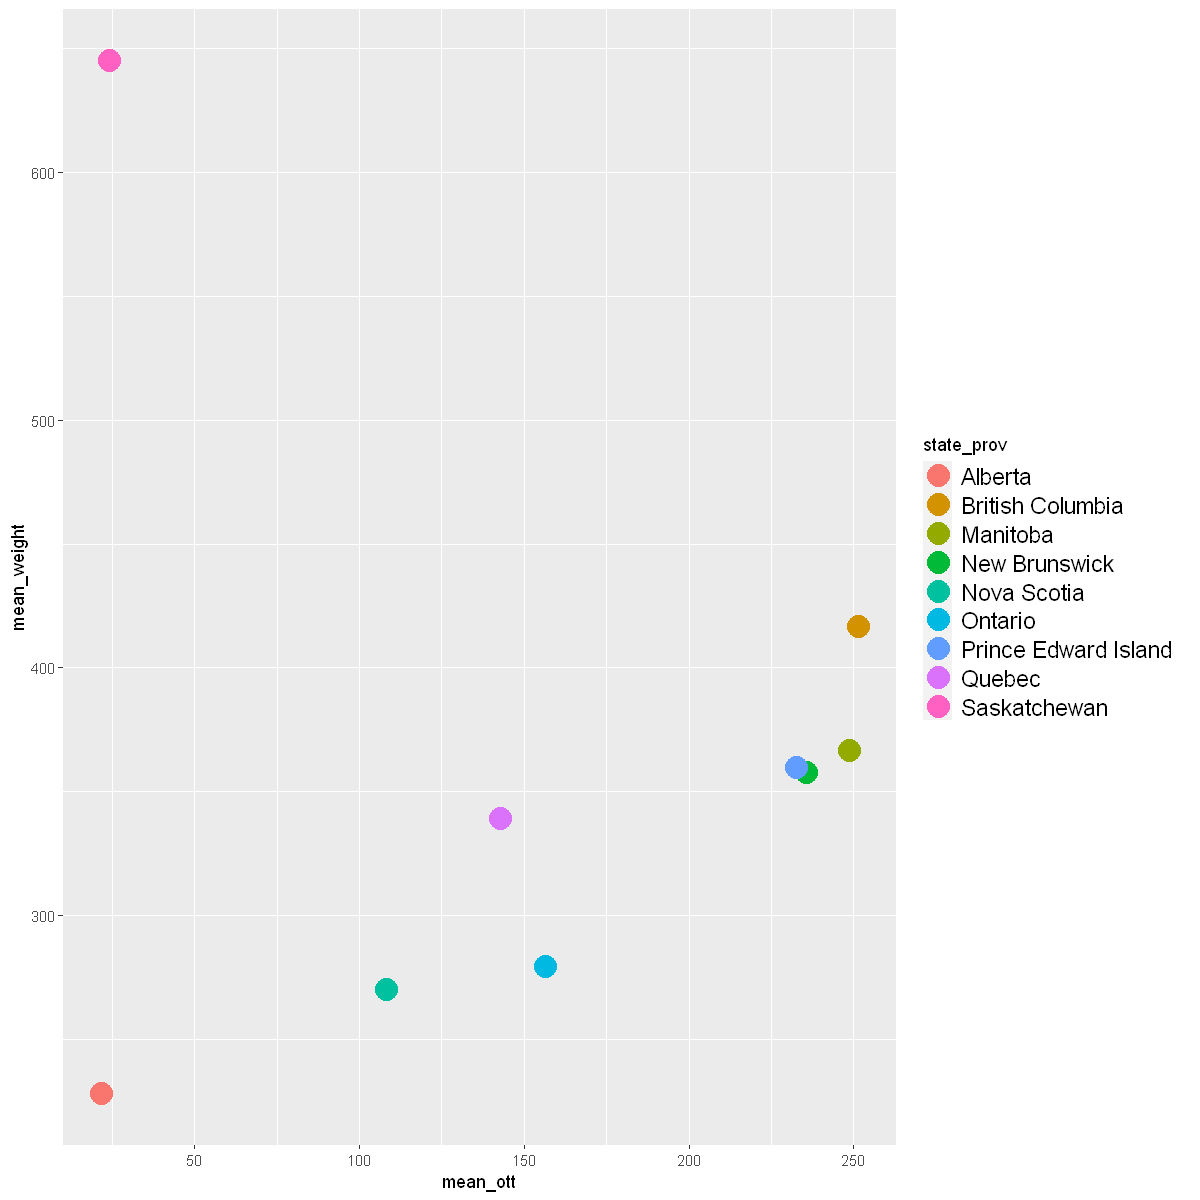

In [108]:
# avg weight / avg ott by provence
options(repr.plot.width = 10, repr.plot.height = 10)
weight_ott_canada_plot <- pumpkins_canada_summary |>
  ggplot(aes(x = mean_ott, y = mean_weight, color = state_prov)) +
  geom_point(size = 6) +
  theme(legend.text = element_text(size = 14))

weight_ott_canada_plot

year,count,mean_weight,mean_ott
<chr>,<int>,<dbl>,<dbl>
2015,3313,328.4398,207.5368
2014,3173,327.9869,198.6641
2013,2888,313.6560,191.3936
2017,3139,307.2380,198.5312
2016,3212,305.6970,199.2751
2018,3299,303.8006,206.1122
2020,2854,283.2188,210.5419
2019,3375,278.7640,195.1946
2021,2758,278.7206,217.1244


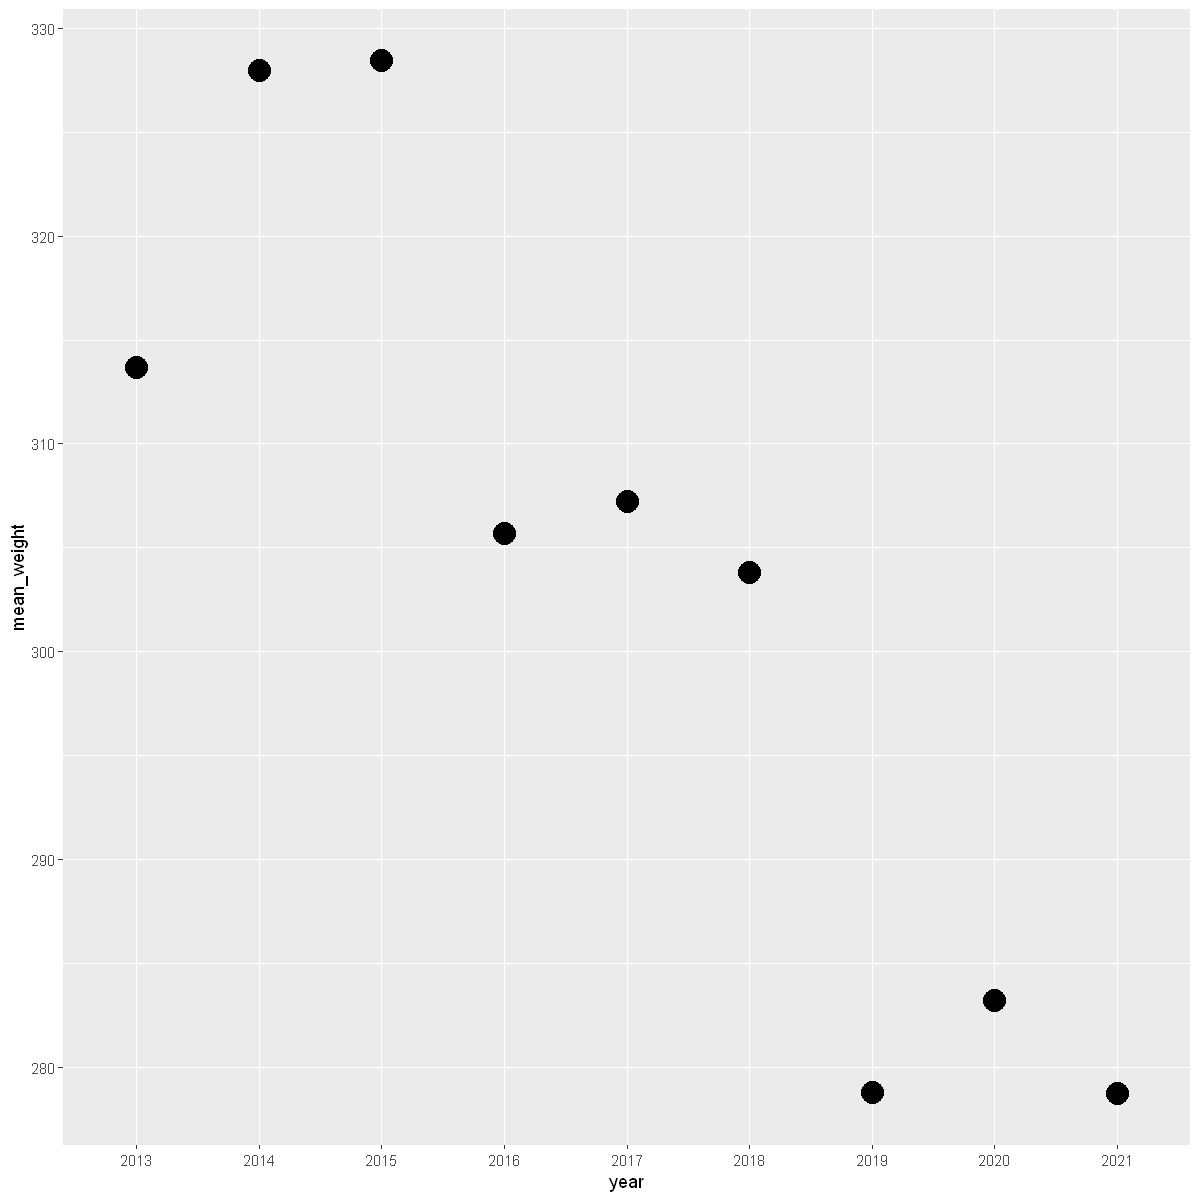

In [124]:
# avg weight by year
pumpkins_year_summary <- pumpkins_tidy |>
  group_by(year) |>
  summarize(count = n(), mean_weight = mean(weight_lbs, na.rm = TRUE), mean_ott = mean(ott, na.rm = TRUE))
pumpkins_year_summary

weight_ott_year_plot <- pumpkins_year_summary |>
  ggplot(aes(x = year, y = mean_weight)) +
  geom_point(size = 6) +
  theme(legend.text = element_text(size = 14))

weight_ott_year_plot

In [130]:
# avg weight by USA states
pumpkins_usa <- pumpkins_tidy |>
  filter(country == "United States")

pumpkins_usa_summary <- pumpkins_usa |>
  group_by(state_prov) |>
  summarize(count = n(), mean_weight = mean(weight_lbs, na.rm = TRUE), mean_ott = mean(ott, na.rm = TRUE)) |>
  arrange(desc(mean_weight))
pumpkins_usa_summary

state_prov,count,mean_weight,mean_ott
<chr>,<int>,<dbl>,<dbl>
Maryland,7,769.7143,329.2857
Maine,332,452.1751,195.0333
Idaho,42,449.8280,244.4615
Illinois,192,446.2461,285.1453
Delaware,5,430.5000,328.6000
...,...,...,...
Nevada,7,156.0428571,123.28571
Arkansas,131,153.8684733,106.02459
Missouri,165,141.9575484,48.50355


Warning message:
"Removed 2 rows containing missing values (geom_point)."


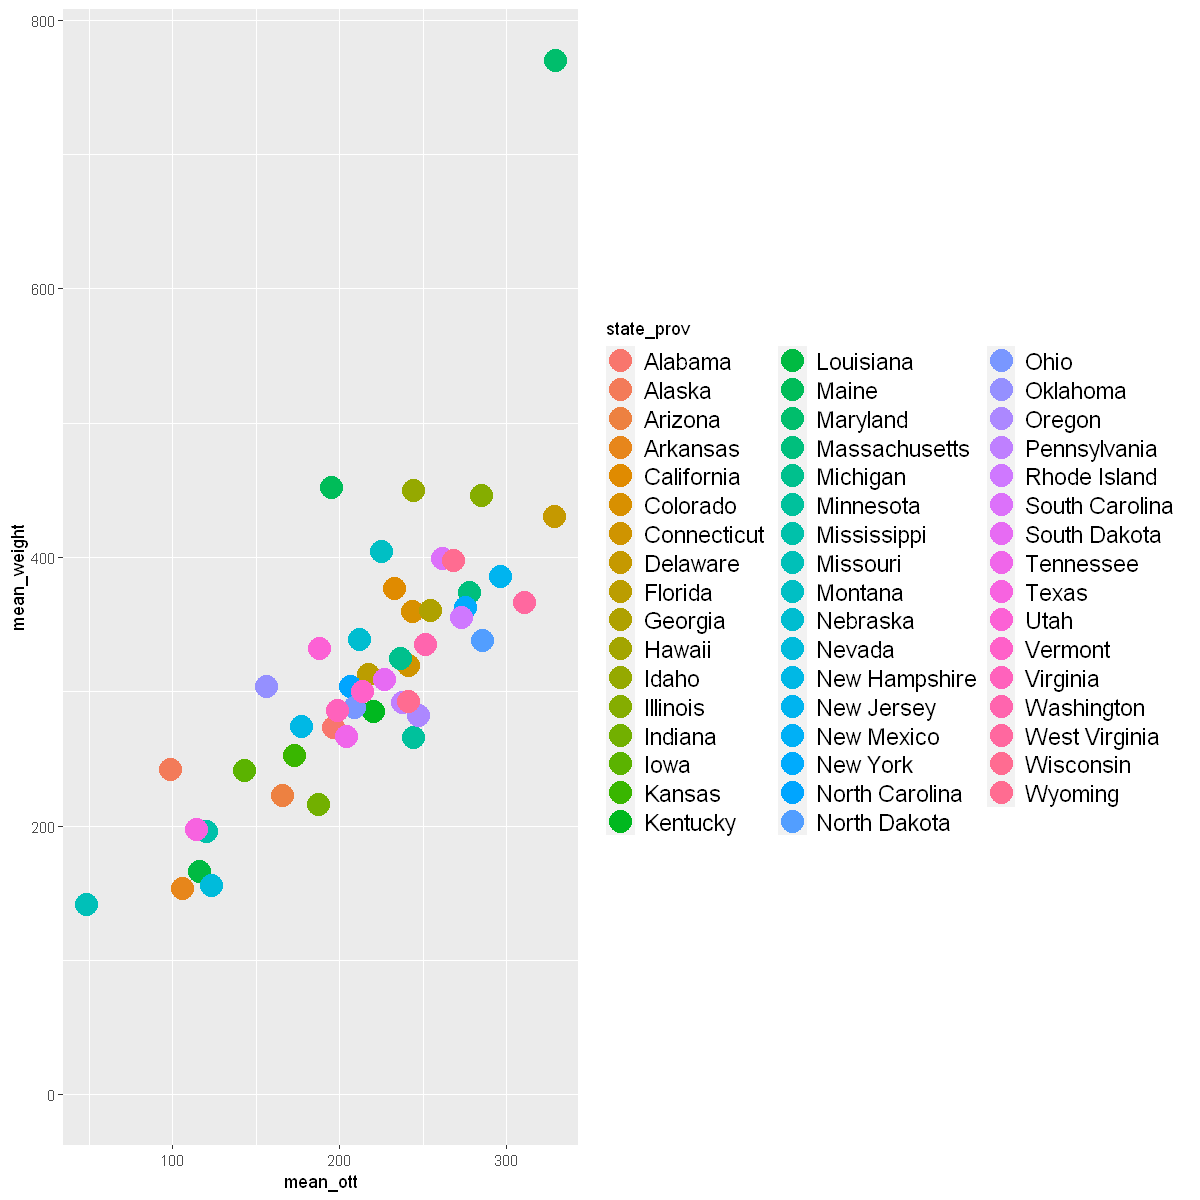

In [127]:
options(repr.plot.width = 10, repr.plot.height = 10)
weight_ott_usa_plot <- pumpkins_usa_summary |>
  ggplot(aes(x = mean_ott, y = mean_weight, color = state_prov)) +
  geom_point(size = 6) +
  theme(legend.text = element_text(size = 14))

weight_ott_usa_plot

# Potential Questions
- The mean weight in lbs of giant pumpkins grown in Europe is different from that of Americas
- The mean weight in lbs of giant pumpkins grown in Province A is different from that of Province B
- The mean weight in lbs of giant pumpkins grown in 2019 is less that that of 2018,